# Project description

You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.

Working with a database, you'll analyze data from competitors and test a hypothesis about the impact of weather on ride frequency.

## Initialization

Loading all the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

## Load Data

Load the data files into DataFrames variables

In [2]:
company = pd.read_csv('/datasets/project_sql_result_01.csv')
neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')
airport = pd.read_csv('/datasets/project_sql_result_07.csv')

## Data Preprocessing

Understand the data and do corrections need to be do if necessary.

Print the general information and sample about the company dataFrame

In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
company.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [5]:
company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [6]:
company.duplicated().sum()

0

In [7]:
company.isna().sum()

company_name    0
trips_amount    0
dtype: int64

**Observation**

- Data type are correct 
- No duplicated data
- From the data, the 50 percentile is less than the average value. Therefore the data is positive skew.
- Data look clean and ready to analyse

Next lets check print the general information and sample about the neighborhoods dataFrame

In [8]:
neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [9]:
neighborhoods.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [10]:
neighborhoods.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [11]:
neighborhoods.duplicated().sum()

0

In [12]:
neighborhoods.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

**Observation**

- Data type are correct 
- No duplicated data
- From the data, the 50 percentile is less than the average value. Therefore the data is positive skew.
- Data look clean and ready to analyse

Then, lets check print the general information and sample about the airport dataFrame

In [13]:
airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [14]:
airport.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [15]:
airport

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [16]:
airport.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [17]:
airport.duplicated().sum()

197

In [18]:
airport.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [19]:
airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


**Observation**

- start_ts columns should in dataframe format. Need to fix to dataframe format.
- From the dataframe can be enrich day from start_ts columns after change the data types.
- Data have duplicated and need to drop the duplicated row. 
- "start_ts" columns can be enrich by day

### Fix the columns

Drop the duplicated row.

In [20]:
airport = airport.drop_duplicates()
airport.shape

(871, 3)

In [22]:
airport_copy = airport.copy()
airport_copy.loc[:, 'start_ts'] = pd.to_datetime(airport_copy.loc[:, 'start_ts'], format='%Y-%m-%d %H:%M:%S')
airport_copy.loc[:, 'start_ts']

0      2017-11-25 16:00:00
1      2017-11-25 14:00:00
2      2017-11-25 12:00:00
3      2017-11-04 10:00:00
4      2017-11-11 07:00:00
               ...        
1060   2017-11-04 14:00:00
1061   2017-11-18 16:00:00
1063   2017-11-25 11:00:00
1064   2017-11-11 10:00:00
1067   2017-11-04 16:00:00
Name: start_ts, Length: 871, dtype: datetime64[ns]

### Enrich data

In [23]:
airport_copy['day'] = airport_copy['start_ts'].dt.day_name()
airport_copy

,start_ts,weather_conditions,duration_seconds,day
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday
...,...,...,...,...
1060,2017-11-04 14:00:00,Good,2700.0,Saturday
1061,2017-11-18 16:00:00,Bad,2186.0,Saturday
1063,2017-11-25 11:00:00,Good,0.0,Saturday
1064,2017-11-11 10:00:00,Good,1318.0,Saturday


## Analyze data

Lets identify top 10 neighborhoods by number of dropoffs and make a graph

In [24]:
top10_neighborhoods = neighborhoods.sort_values(by='average_trips', ascending=False).head(10)
top10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


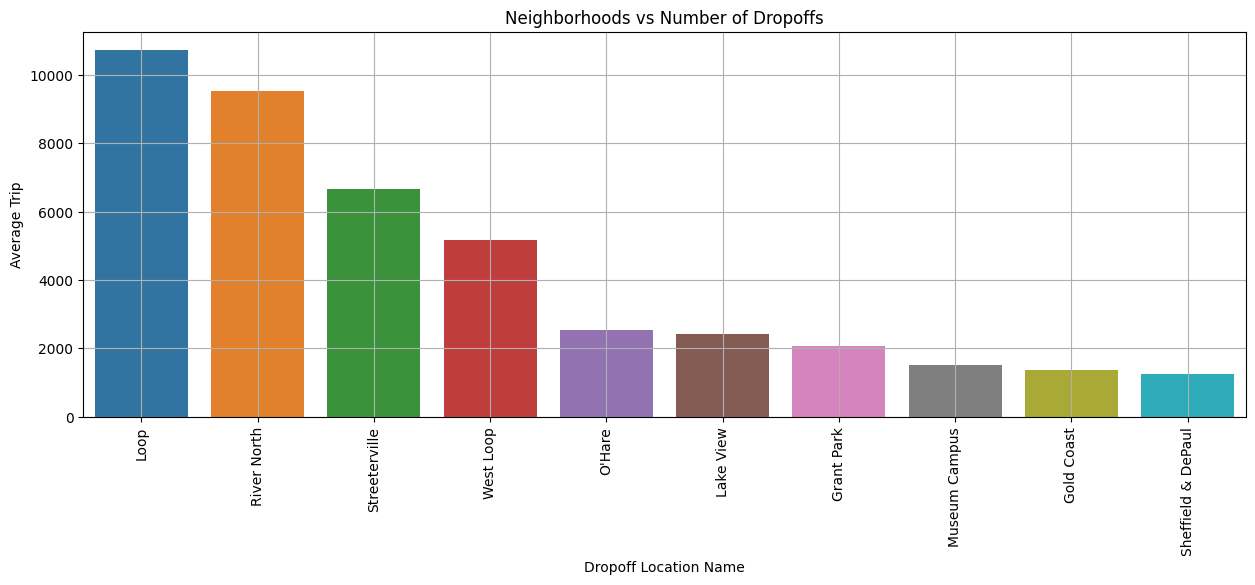

In [25]:
fig = plt.subplots(figsize =(15, 5))
sns.barplot(x='dropoff_location_name',y='average_trips',data=top10_neighborhoods)
plt.title('Neighborhoods vs Number of Dropoffs')
plt.xticks(rotation='vertical')
plt.xlabel('Dropoff Location Name')
plt.ylabel('Average Trip')
plt.grid()
plt.show()

**Review**

- Loop neighboorhood has the highest number of dropoffs that reach more than 10000 average trips.
- The 3 least average trips from the graph where Museum Campus,Gold Coast, and Sheffield & DePaul which reach below 2000 trips.
- From the graph, Loop neighborhoods is the famous place and maybe have the highest population that used cab as a main transportation in that area.  

Now, lets see the graph of taxi companies and number of rides.

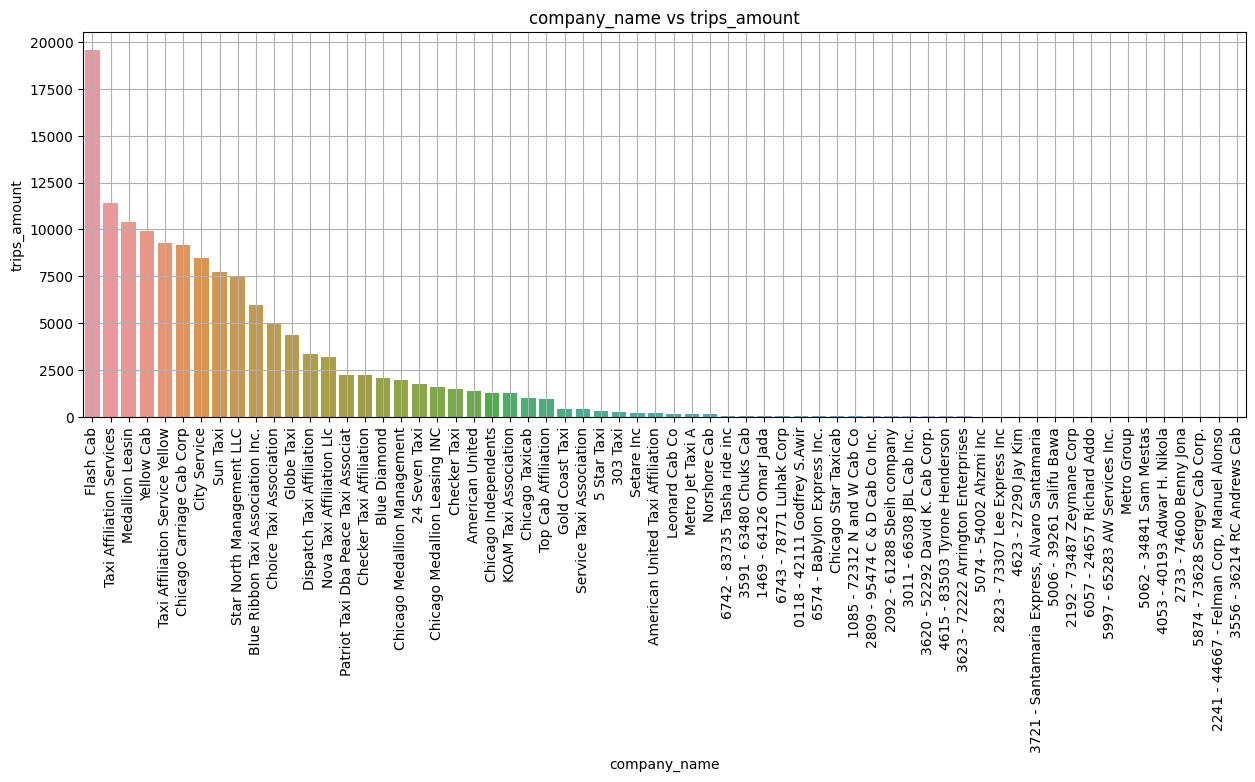

In [26]:
fig = plt.subplots(figsize =(15, 5))
sns.barplot(x='company_name',y='trips_amount',data=company)
plt.title('company_name vs trips_amount')
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

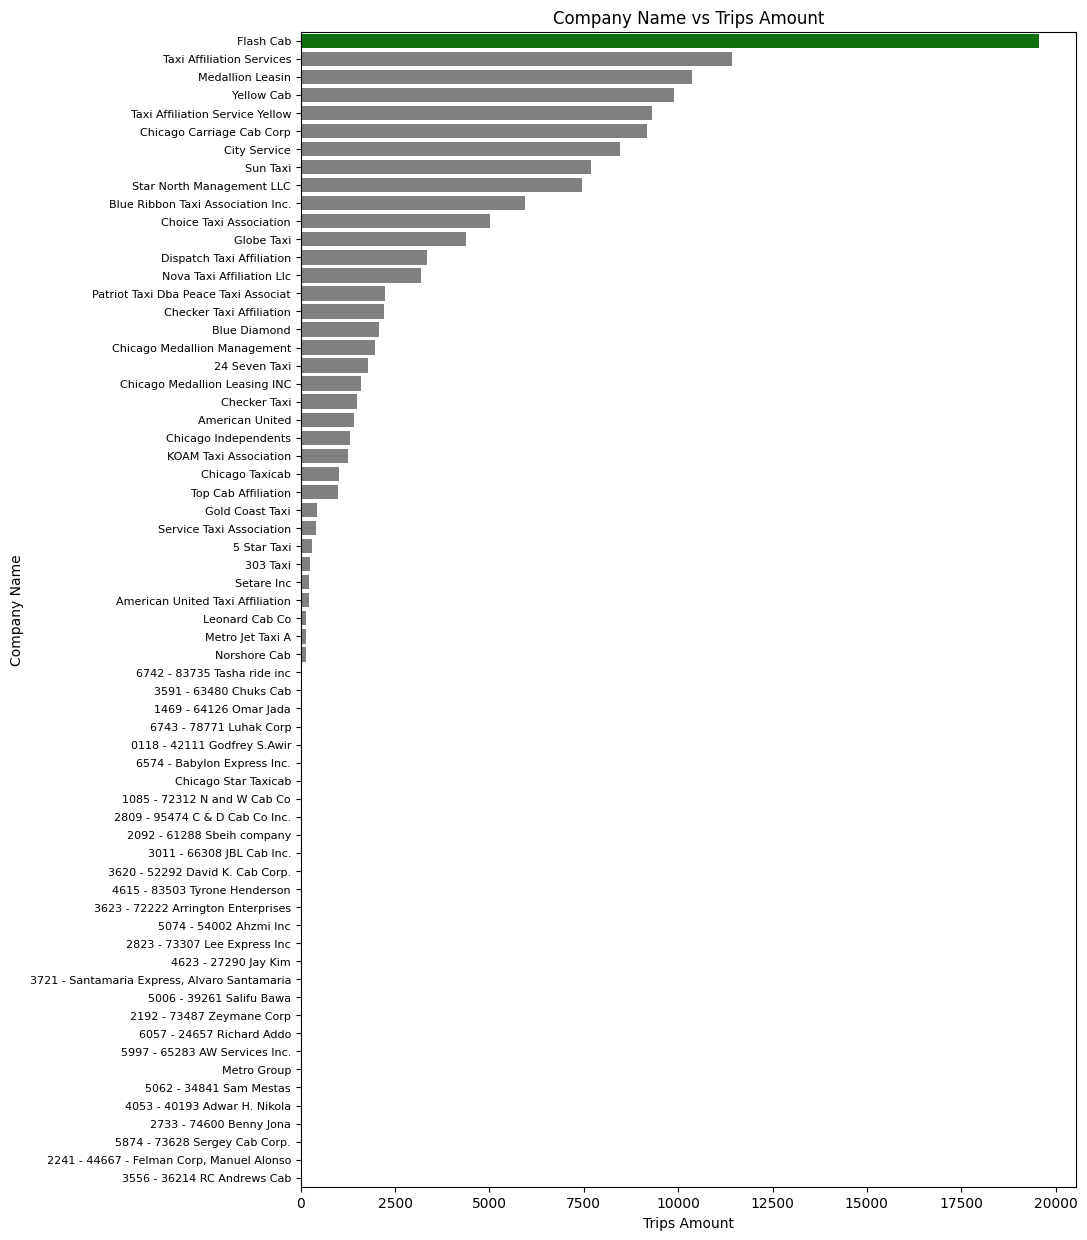

In [28]:
company_names = (
    company
    .groupby("company_name")
    .agg({"trips_amount":"mean"})
    .sort_values(by="trips_amount", ascending=False)
    .index
)
cls = ["green" if index == 0 else "grey" for index in range(len(company_names))]
fig = plt.subplots(figsize =(10, 15))
sns.barplot(y='company_name',x='trips_amount',data=company, palette=cls)
plt.title('Company Name vs Trips Amount')
plt.xlabel('Trips Amount')
plt.ylabel('Company Name')
ticks = plt.yticks()
plt.yticks(fontsize=8)
plt.show()

**Review**

- Top 10 companies reach higher than 5000 trips 
- Flash Cab get the highest trips amount which reach more than 17500 far left behind the 2nd place around 7500 trips. 
- Flash Cab is the very recomended and the very famous company by passengers compared with other companies 

## Test statistical hypotheses

Lets test the hypothesis where if the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays. For instance, maybe rainy days cause different pattern for ride duration compared with good days. Null hypothessis is 
if the average duration of rides in rainy Saturdays is different between the average duration of rides good days in Saturday.
Let the significance level be 0.05 which most common significant level used.

In [29]:
rainy_days = airport_copy[airport_copy['weather_conditions'] == 'Bad']
rainy_days_duration = list (rainy_days ['duration_seconds'])

good_days = airport_copy[airport_copy['weather_conditions'] == 'Good']
good_days_duration = list (good_days ['duration_seconds'])

alpha = 0.05

results_plan = st.ttest_ind(rainy_days_duration, good_days_duration, equal_var = False)

# p-value 
print('p-value:', results_plan.pvalue) 

if (results_plan.pvalue > alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 9.126383933880083e-08
We can't reject the null hypothesis


**Observation**

From the t-test, the null hypothesis is rejected. Therefore, the average duration of rides is differ between rainy days and good days. The different maybe cause due to rainy days cause the cab driver drive slowly due to cannot see the road well or maybe the traffic is slow.

## Conclusion

This project purpose is to find patterns in the available information to understand passenger preferences and the impact of external factors on rides. With working with a database, data will be analyze from competitors and test a hypothesis about the impact of weather on ride frequency. 

**Parsing data from website**

Firstly, the data on weather in Chicago in November 2017 from the website will be parsing. The parsing data will be inserted into variable weather_records. Language SQL was used here.

**Exploratory data analyse**

By using language SQL, slice the number of taxi rides for each taxi company for November 15-16, 2017. Aggregate functions and grouping and condition for 15-16 November 2017 were inserted. 

Next, by using the data before, slice the number of rides for every taxi company whose name contains the words "Yellow" or "Blue" for November 1-7, 2017. Tables cabs and trips where join and slice the data with the condition needed. Result show that company named Yellow Cab has the highest trips amount which was 33668 trips.

After that, on November 1-7, 2017, Flash Cab and Taxi Affiliation Services were the most popular taxi companies. Therefore, the number of rides for these two companies will be indentify. Result show that Flash Cab get 64084 trips and Taxi Affiliation Services	get 37583 trips while the rest combined get 335771. Flash Cab differ with the rest combined almost 20 percent while Taxi Affiliation Services differ was around 10 percent. 

**Preparation data hypothesis**

Hypothesis said the duration of rides from the the Loop to O'Hare International Airport changes on rainy Saturdays. Therefore, before start test the analysis, the data will be slice with Loop and O'Hare International Airport. Then, the data will be break into two group which were Bad and Good for weather. If the data for weather was no available, the rides will be ignored and not in the data.

**Exploratory data analysis (Python)**

By using the Python and the result above, the result will be analysed visually in detailed and graph. Firstly, the result files will be imported and the data will be analysed and be investigate. The data will be fixed first like data types or any duplicated row. After finished, analysed will be do. 

First analysed was to identify the top 10 neighborhoods in terms of drop-offs. By using the bargraph, the result show that the
Loop neighboorhood has the highest number of dropoffs that reach more than 10000 average trips.The 3 least average trips from the graph where Museum Campus,Gold Coast, and Sheffield & DePaul which reach below 2000 trips.In conclusion, Loop neighborhoods is the famous place and maybe have the highest population that used cab as a main transportation in that area.

Second analysis was visualize taxi companies and number of rides from the result data. By using the bargraph, the result show that the top 10 companies reach higher than 5000 trips. Flash Cab get the highest trips amount which reach more than 17500 far left behind the 2nd place around 7500 trips. In conclusion, Flash Cab is the very recomended and the very famous company by passengers compared with other companies

**Testing hypotheses (Python)**

By using Python and the data that have been prepared before, the result will be tested by using t-test. The null hypothesis was if the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays. 

From the t-test, the null hypothesis is rejected. Therefore, the average duration of rides is differ between rainy days and good days. The different maybe cause due to rainy days cause the cab driver drive slowly due to cannot see the road well or maybe the traffic is slow.

In Conclusion, Loop neighborhood have the most amount of trips and would be the main transportation there was cab. Flash Cab company was passenger preferences company cab to used compared with other companies by far differences in trips amount. Lastly, the weather will give an impact on ride frequency.